<a href="https://colab.research.google.com/github/Mi1kDev/CST3133_CW/blob/main/CST3133_CourseWork_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Coursework Part 1


Connecting the project to google drive for easy members access

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 1.1.1 Dataset Selection and Problem Definition

-- clustering problem

-- database from kaggle link bellow

https://www.kaggle.com/code/mervanmunis/bank-transaction-for-fraud-detection-eda-ml



In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/drive/MyDrive/CST3133_CW/datasets/test.csv")
print(dataset.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [3]:
print(dataset.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

# 1.1.2 Data Preprocessing

Handle missing values appropriately, as required.

Scale/normalize numerical features and encode categorical variable, as required.

Conduct logical feature selection or engineering, as required.

In [5]:
# Checking for missing values
missing_values = ["n/a", "na", "--"]
print(dataset.isnull().sum())
print(dataset.isnull().sum().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64
0


In [6]:
#Converting dates to  datetime objects
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['PreviousTransactionDate'] = pd.to_datetime(dataset['PreviousTransactionDate'])

In [7]:
#Normalization of data using min-max feature scaling
def normalizeColumn(inputDS, columnName):
  normalizedName = "Normalized"+columnName
  inputDS[normalizedName] = (inputDS[columnName] - inputDS[columnName].min()) / (inputDS[columnName].max() - inputDS[columnName].min())

normalizeColumn(dataset, "TransactionAmount")
normalizeColumn(dataset, "AccountBalance")
normalizeColumn(dataset, "TransactionDuration")
normalizeColumn(dataset, "CustomerAge")
normalizeColumn(dataset, "LoginAttempts")

In [8]:
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical data

def mapHour(h):
  if h >= 5 and h < 12:
    return "Morning"
  elif h >= 12 and h < 17:
    return "Afternoon"
  elif h >= 17 and h < 20:
    return "Evening"
  elif h >= 20 or h < 5:
    return "Night"
  else:
    return "NaN"

def convertDate(ds, dateColumn, dayColumn, timeColumn):
  print(ds[dateColumn])
  day = ds[dateColumn].dt.day_name()
  hour = ds[dateColumn].dt.hour
  hour = hour.map(mapHour)

  ds[dayColumn] = day
  ds[timeColumn] = hour

convertDate(dataset, 'TransactionDate', 'TransactionDateWeek', 'TransactionDateTimeOfDay')
convertDate(dataset, 'PreviousTransactionDate', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay')

categoricalData = dataset[['Location', 'Channel', 'CustomerOccupation', 'TransactionType', 'TransactionDateWeek', 'TransactionDateTimeOfDay', 'PreviousTransactionDateWeek', 'PreviousTransactionDateTimeOfDay']].columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
oneHotEncoded = encoder.fit_transform(dataset[categoricalData])

dataset['Hour'] = dataset['TransactionDate'].dt.hour

oneHotCategoricalData = pd.DataFrame(oneHotEncoded, columns=encoder.get_feature_names_out(categoricalData))

#Dataset with all values for model training

processedDataset = pd.concat([dataset[['NormalizedCustomerAge', 'NormalizedTransactionAmount', 'NormalizedAccountBalance', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts']], oneHotCategoricalData], axis=1)

testDataset = pd.concat([dataset[['NormalizedCustomerAge', 'NormalizedTransactionAmount', 'NormalizedAccountBalance', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts']], oneHotCategoricalData[['Channel_ATM', 'Channel_Branch', 'Channel_Online', 'TransactionType_Debit', 'TransactionType_Credit']]], axis=1)




0      2023-04-11 16:29:14
1      2023-06-27 16:44:19
2      2023-07-10 18:16:08
3      2023-05-05 16:32:11
4      2023-10-16 17:51:24
               ...        
2507   2023-04-26 17:09:36
2508   2023-03-22 17:36:48
2509   2023-08-21 17:08:50
2510   2023-02-24 16:24:46
2511   2023-02-14 16:21:23
Name: TransactionDate, Length: 2512, dtype: datetime64[ns]
0      2024-11-04 08:08:08
1      2024-11-04 08:09:35
2      2024-11-04 08:07:04
3      2024-11-04 08:09:06
4      2024-11-04 08:06:39
               ...        
2507   2024-11-04 08:11:29
2508   2024-11-04 08:11:42
2509   2024-11-04 08:08:39
2510   2024-11-04 08:12:22
2511   2024-11-04 08:07:49
Name: PreviousTransactionDate, Length: 2512, dtype: datetime64[ns]


# 1.1.3 Exploratory Data Analysis

Create insightful visualizations, e.g., histograms and correlation heatmaps.

Identify and comment on trends, patterns, and potential biases in the data.

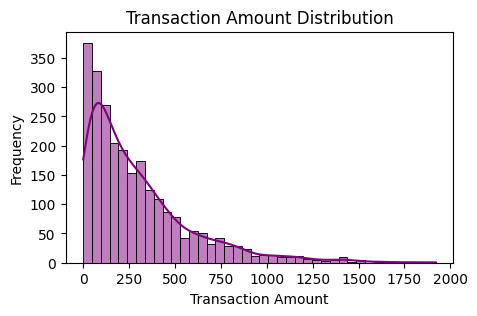

In [9]:
#Transaction Amount Diistribution

plt.figure(figsize = (5,3))
sns.histplot(dataset['TransactionAmount'], kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

From the transaction distribution graph we could observe we have low to high volume transatcions.

In our case the high volume transactions are rare, form this point we can consider to secure it for potential fraudulent transaction

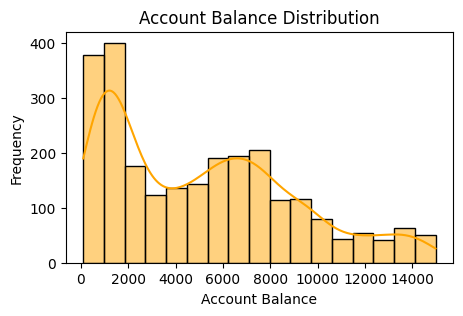

In [10]:
#Account Balance Distribution
plt.figure(figsize = (5,3))
sns.histplot(dataset['AccountBalance'], kde=True, color='orange')
plt.title('Account Balance Distribution')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

The high amount of transaction as shown on the plot could carry risk in terms of low balances

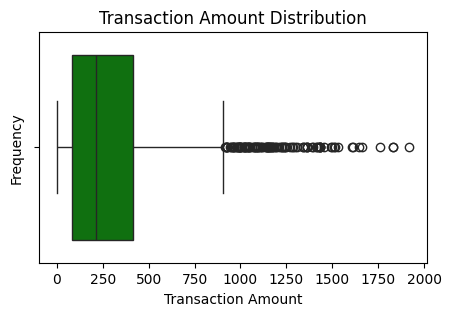

In [11]:
# Detecting outliers
plt.figure(figsize=(5,3))
sns.boxplot(x='TransactionAmount', data=dataset, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Outliers overview brough us the observation of abnormally high transactions, which are in fraud risk.

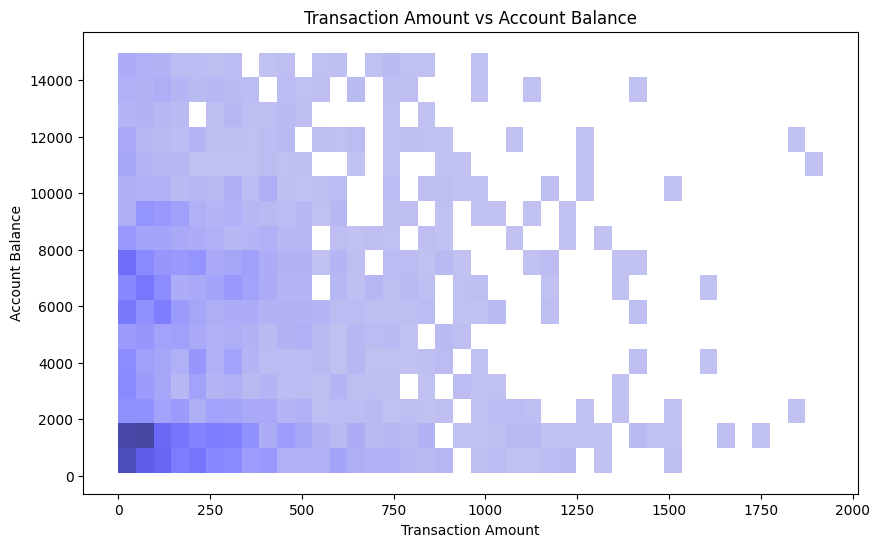

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(x=dataset['TransactionAmount'], y=dataset['AccountBalance'], kde=True, color = 'blue')
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

As presented the account balance is low and high amount transactions could vary of a potential risk, therefore we need to consider this and be extra carefull in terms of handaling those transcations.

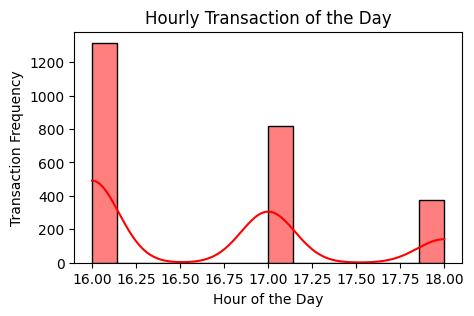

In [13]:
# Hourly Transaction of the Day
plt.figure(figsize=(5,3))
sns.histplot(dataset['Hour'], kde=True,color='red')
plt.title('Hourly Transaction of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Frequency')
plt.show()

The main transactions throughout the day are between 16:00-18:00, the high transactions are from 16:00 and slowwing down between 1&:00 and 18:00

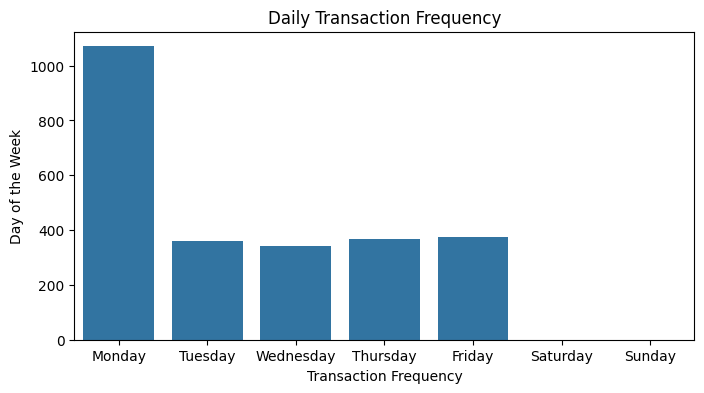

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data = dataset, x='TransactionDateWeek', order=['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Day of the Week')
plt.show()

Transactions are shown the most during the week days, compare to the weekends where the decrease number of transactions may vary of abnormal behavior.

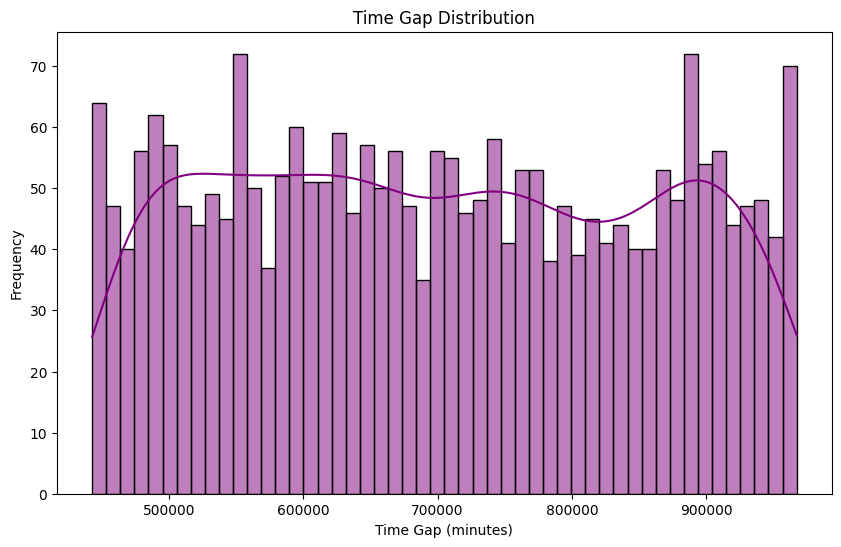

In [15]:
# Time Gap analysis for anonaly detection
dataset['TimeGap'] = -1 * (dataset['TransactionDate'] - dataset['PreviousTransactionDate']).dt.total_seconds() / 60

# plot the TimeGap
plt.figure(figsize=(10,6))
sns.histplot(dataset['TimeGap'], kde=True, bins=50, color='purple')
plt.title('Time Gap Distribution')
plt.xlabel('Time Gap (minutes)')
plt.ylabel('Frequency')
plt.show()

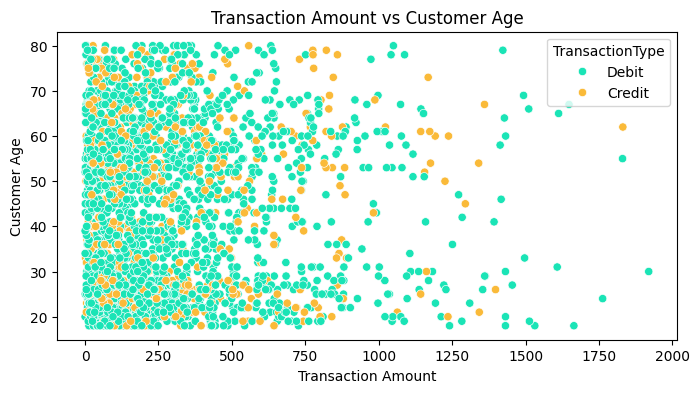

In [16]:
# Tranasaction Amount vs Customer Age Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x='TransactionAmount', y='CustomerAge', data=dataset, hue='TransactionType', palette='turbo')
plt.title('Transaction Amount vs Customer Age')
plt.xlabel('Transaction Amount')
plt.ylabel('Customer Age')
plt.show()

The plot above shows how the transaction amount varies based on the customer age.

We may determinate if there are any patterns or unusual behaviors of how people of different ages spend money by examining the plot.

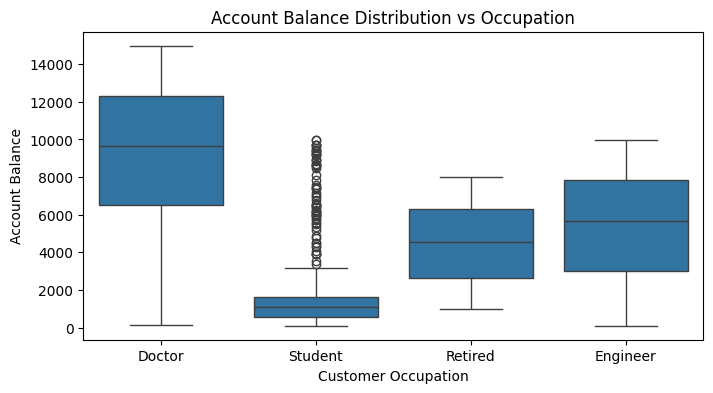

In [17]:
# Account Balance vs Occupation Analysis
plt.figure(figsize=(8,4))
sns.boxplot(x='CustomerOccupation', y='AccountBalance', data=dataset)
plt.title('Account Balance Distribution vs Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Account Balance')
plt.show()

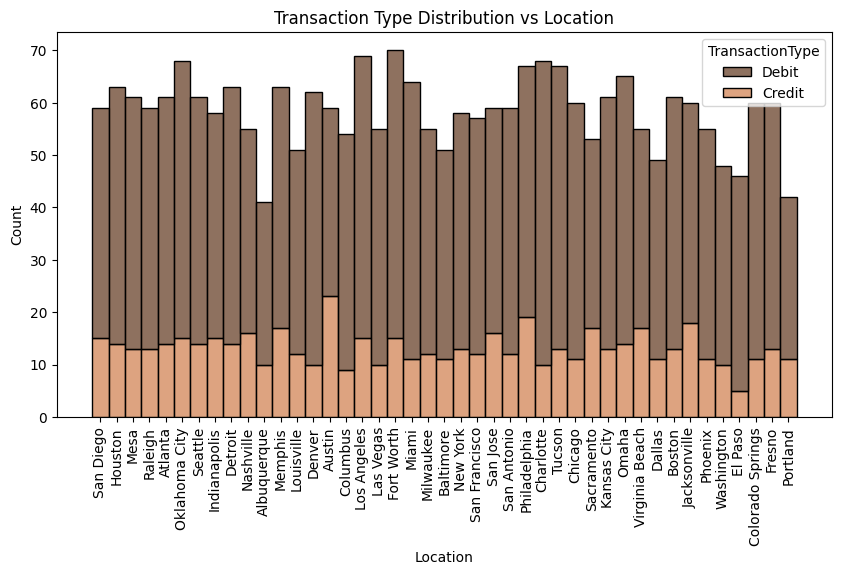

In [19]:
# Analysing Transaction Type Distribution vs Location
plt.figure(figsize=(10,5))
sns.histplot(x='Location', data=dataset, hue='TransactionType', multiple='stack', palette='copper')
plt.title('Transaction Type Distribution vs Location')
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

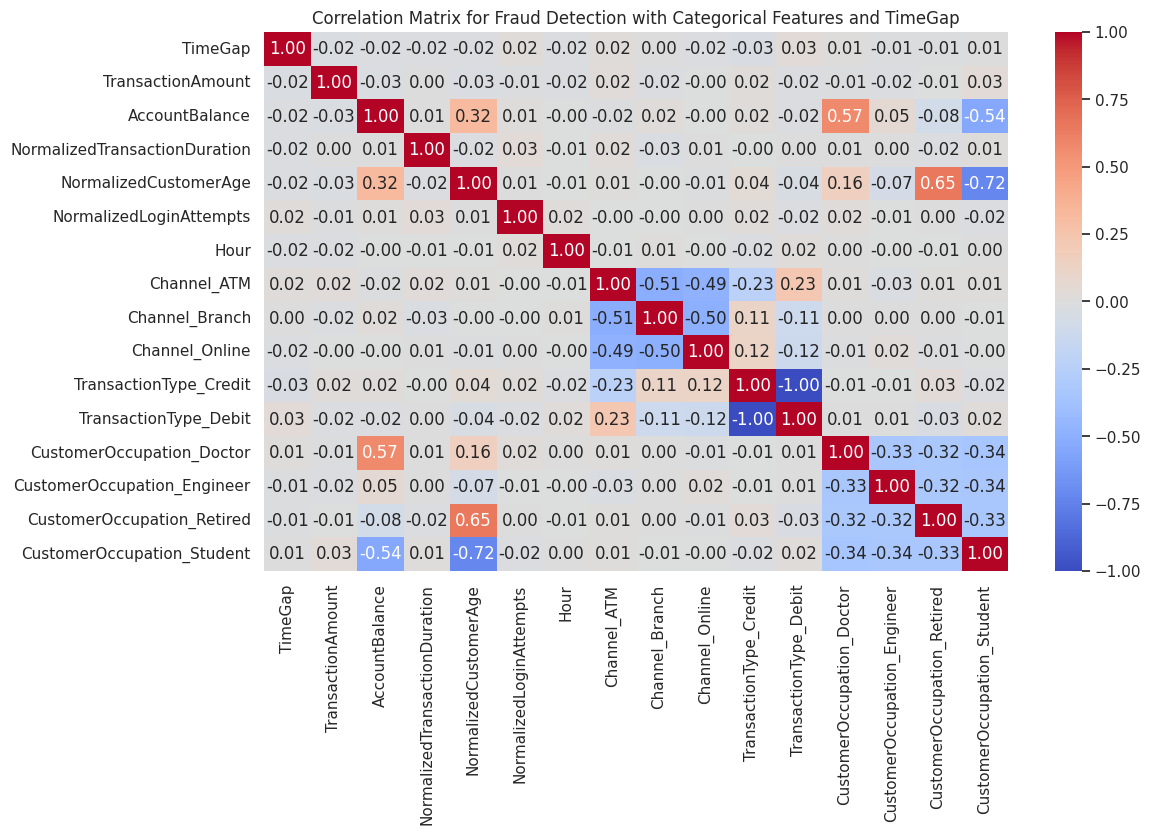

In [24]:
# Correlation Heatmaps implementation
# Selecting features for correlation analysis
features_for_correlation = ['TransactionAmount','AccountBalance', 'NormalizedCustomerAge', 'NormalizedTransactionDuration', 'NormalizedLoginAttempts', 'Hour', 'Channel', 'TransactionType', 'CustomerOccupation', 'TimeGap']
data_for_correlation = dataset[features_for_correlation]

#One hot encoding for categorical data
categorical_features = ['Channel', 'TransactionType', 'CustomerOccupation']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data_for_correlation[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

#combine the encoded features with numerical
numerical_features = ['TimeGap', 'TransactionAmount', 'AccountBalance', 'NormalizedTransactionDuration', 'NormalizedCustomerAge', 'NormalizedLoginAttempts', 'Hour']
data_for_correlation = pd.concat([data_for_correlation[numerical_features], encoded_df], axis=1)

# Calculating the correlation matrix
corr_matrix = data_for_correlation.corr()

# Plotting the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Fraud Detection with Categorical Features and TimeGap')
plt.yticks(rotation=0)
plt.show()

The correlation heatmap illustrates the interrelationships among features in a dataset, employing a color gradient to indicate the strength and nature of these correlations.

Warm colors signify positive correlations, while cool colors denote negative correlations, and neutral colors indicate weak or absent relationships.

This visualization serves as a valuable tool for data analysts to detect trends, enhance feature selection, comprehend model interactions, and ultimately extract actionable insights from the data.

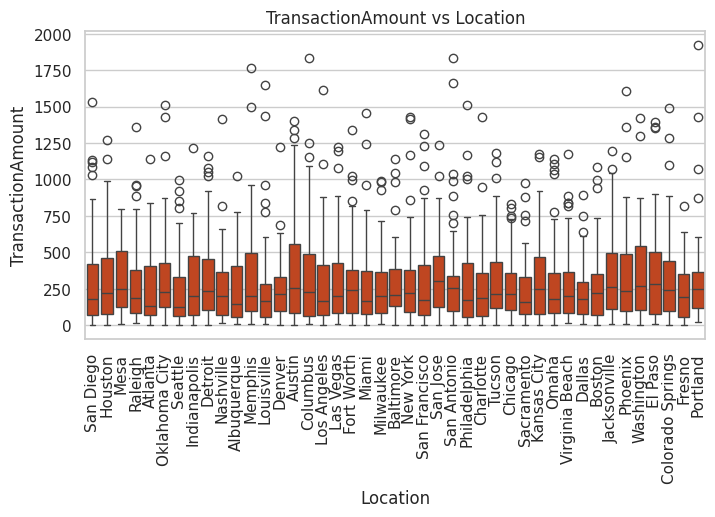

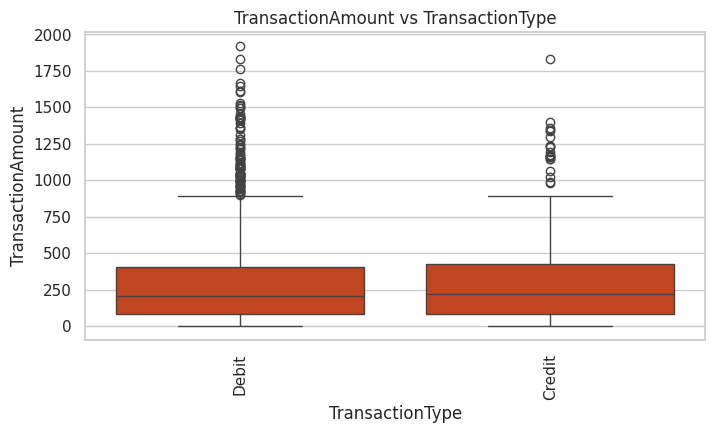

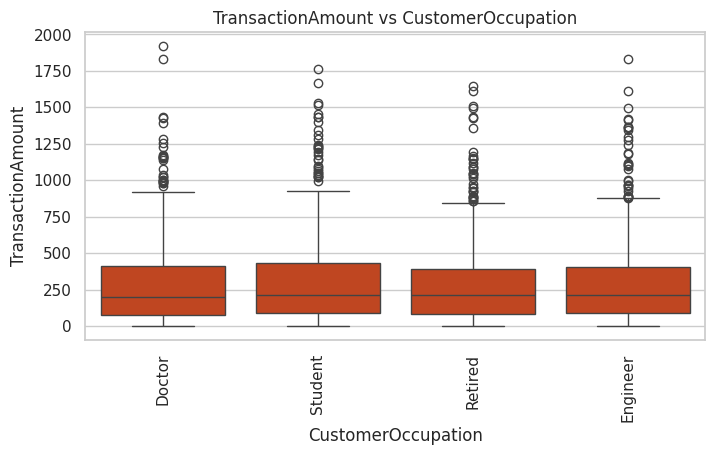

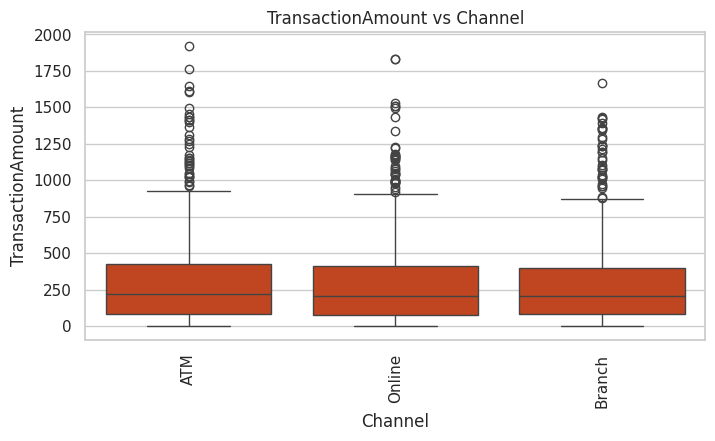

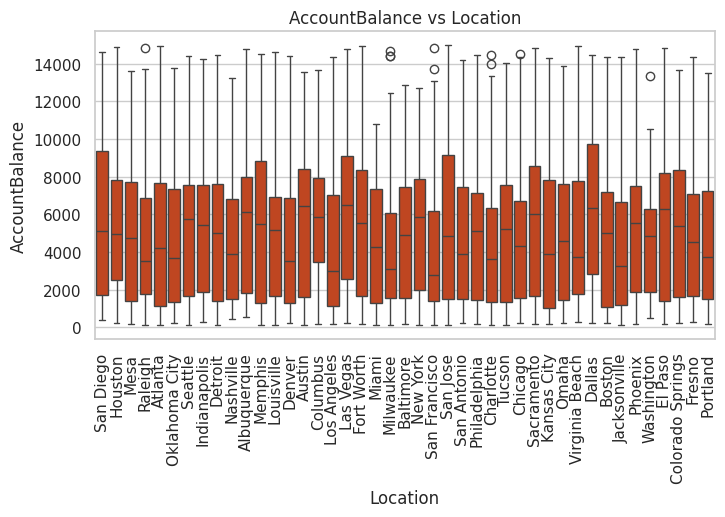

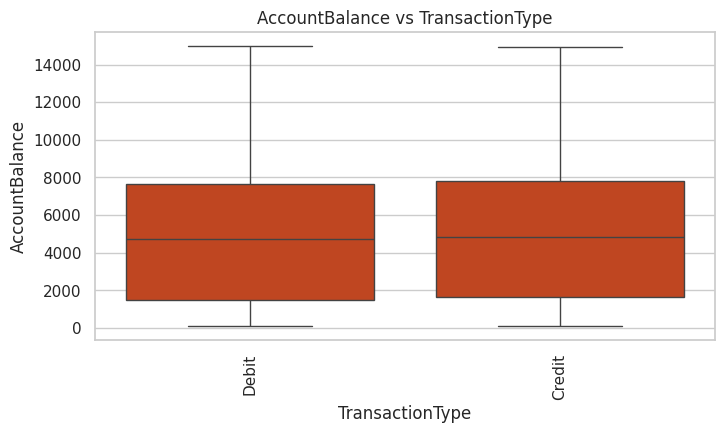

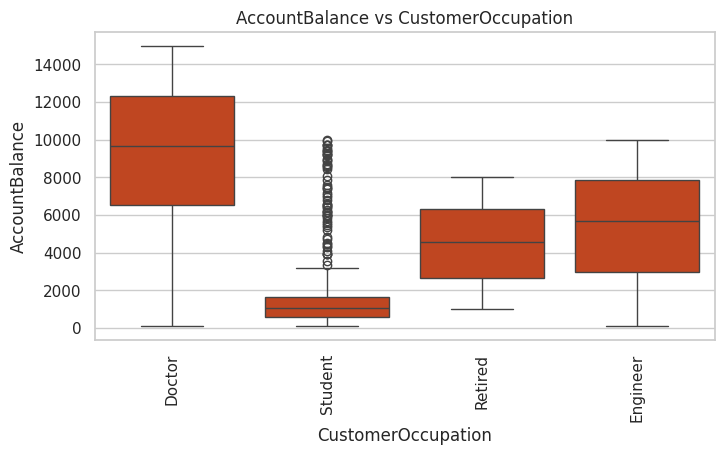

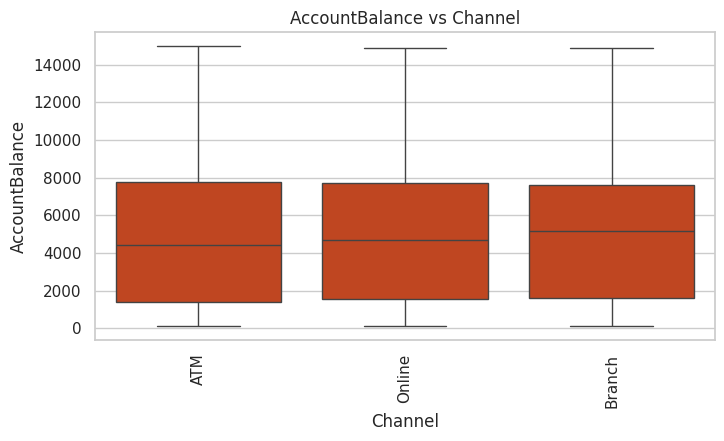

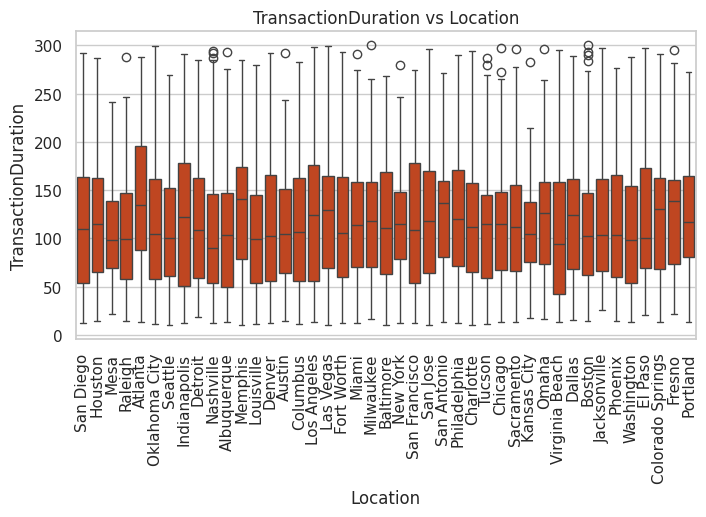

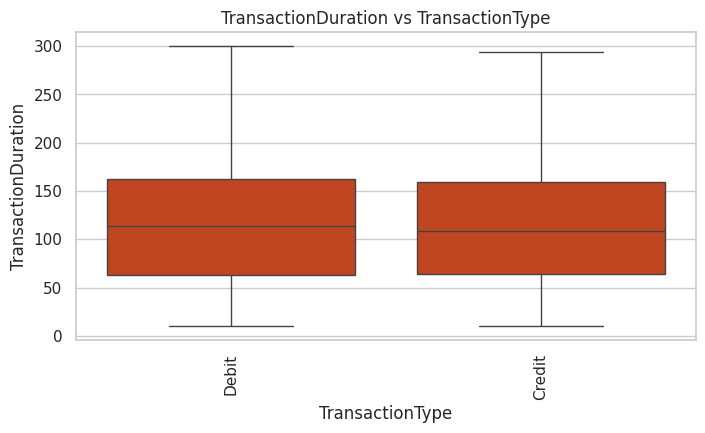

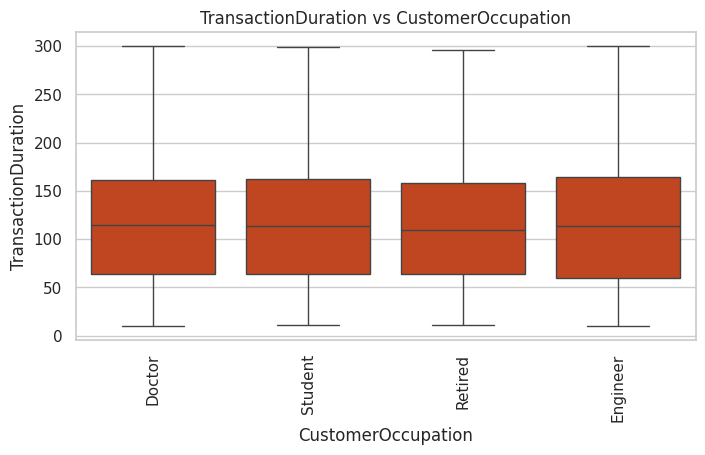

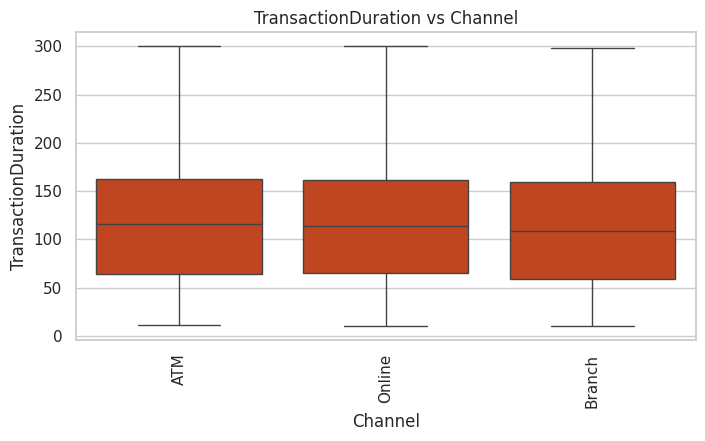

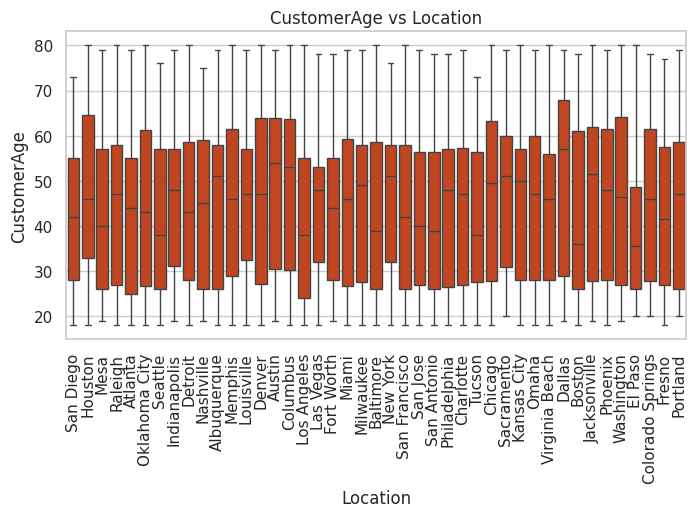

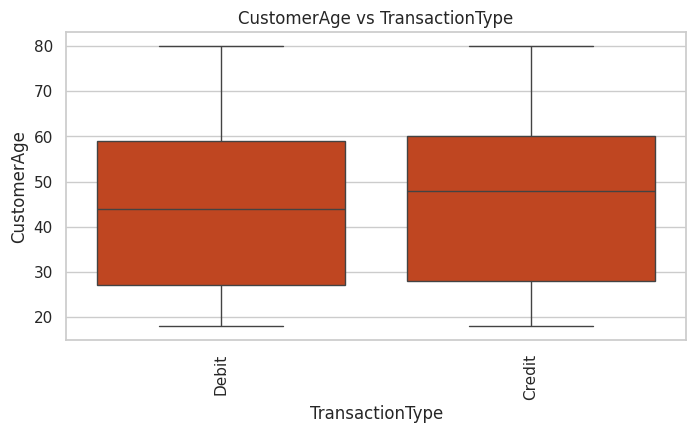

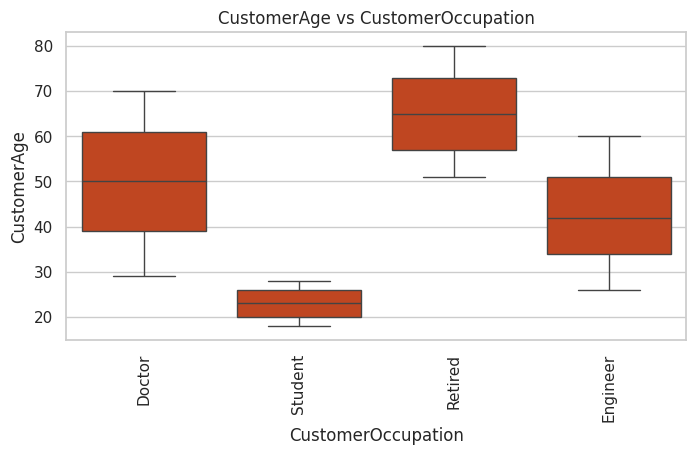

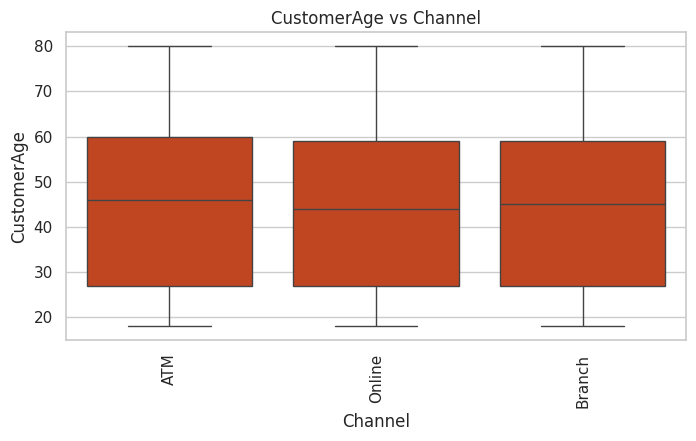

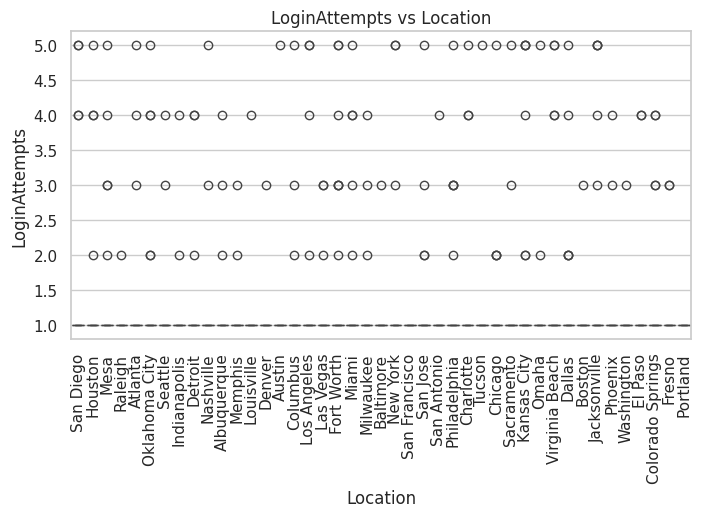

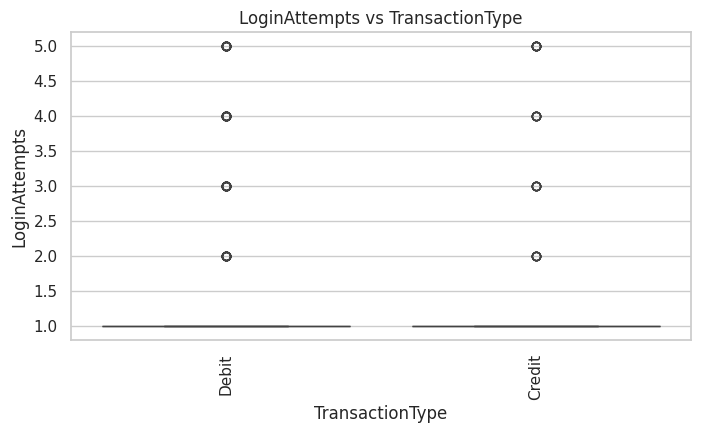

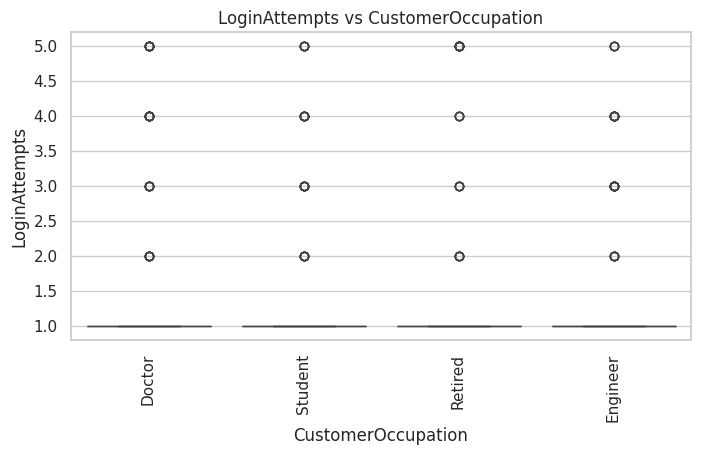

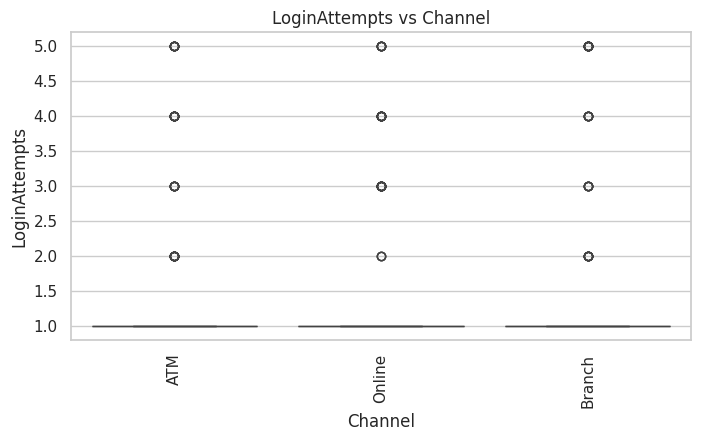

In [20]:
# Numerical and Categorical Analysis over the Columns
#set a colorful style for the plots
sns.set(style='whitegrid', palette='turbo_r')

# creating numerical columns for analysis
numerical_columns = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'CustomerAge', 'LoginAttempts']
# creating categorical columns for analysis
categorical_columns = ['Location', 'TransactionType', 'CustomerOccupation', 'Channel']

for numerical in numerical_columns:
  for categorical in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=categorical, y=numerical, data=dataset)
    plt.title(f'{numerical} vs {categorical}')
    plt.xticks(rotation=90) #rotating x-axis label for better readibility
    plt.xlabel(categorical)
    plt.ylabel(numerical)
    plt.show()


Using box plots, the plots show a comparison of the dataset's numerical and categorical variables.  Through the display of central tendency, spread, and skewness, it aids in the analysis of patterns, trends, and potential outliers by illustrating how the distribution across numerical variables differs across other category features.

 By examining these connections, the research sheds light on how various aspects could be influenced by the interaction.  Visualising more data and model development helps to understand it.

# 1.1.4 Model Development and Evaluation

Train and evaluate learning models, e.g., supervised: linear regression, decision trees, and unsupervised: K-means.

Use appropriate evaluation metrics, e.g., R-squared, accuracy, precision, recall, F1-score, etc.

Provide a clear interpretation of the model performance using classification report, tables or graphs.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# K Means for Fraud Detection

In [25]:
#visualization of higher dimensional data via multi-dimensional scaling
from sklearn.manifold import MDS

mds = MDS(n_components=2)
reducedCluster = mds.fit_transform(testDataset)


In [26]:
# Elbow Method for identifying optimal K Value
from scipy.spatial.distance import cdist
distortions = []
inertia = []
K = range(1, 10)
for k in K:
  kMeans = KMeans(n_clusters = k, random_state=42)
  kMeans.fit(reducedCluster)
  distortions.append(sum(np.min(cdist(reducedCluster, kMeans.cluster_centers_, 'euclidean'), axis=1)**2) / reducedCluster.shape[0])
  inertia.append(kMeans.inertia_)



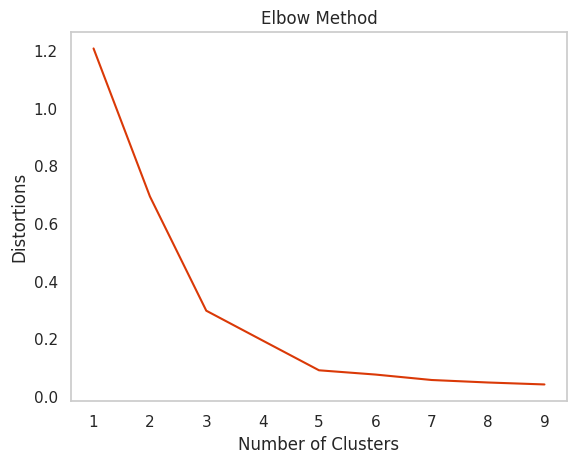

In [27]:
# Plot using distortions
plt.plot(K, distortions)
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")
plt.title("Elbow Method")
plt.grid()
plt.show()

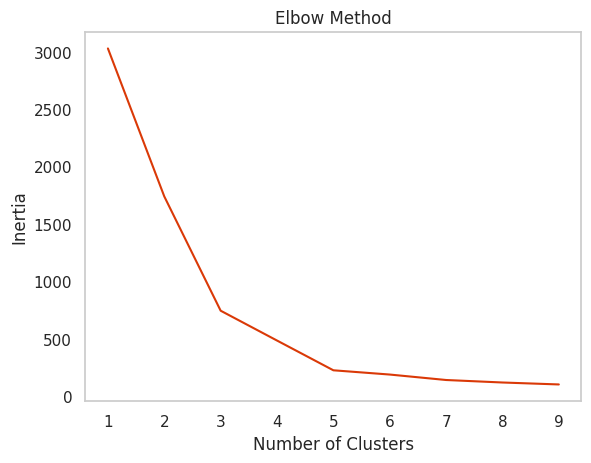

In [28]:
# Plot using inertia
plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [29]:
fraud_k_means = KMeans(n_clusters = 5, random_state=42)
fraud_k_means.fit(reducedCluster)

processedDataset['Clustered'] = fraud_k_means.labels_


In [30]:
fraud_silhouette_avg = silhouette_score(reducedCluster, processedDataset['Clustered'])
print(f"Silhouette Score: {fraud_silhouette_avg}")

Silhouette Score: 0.7214395553818798


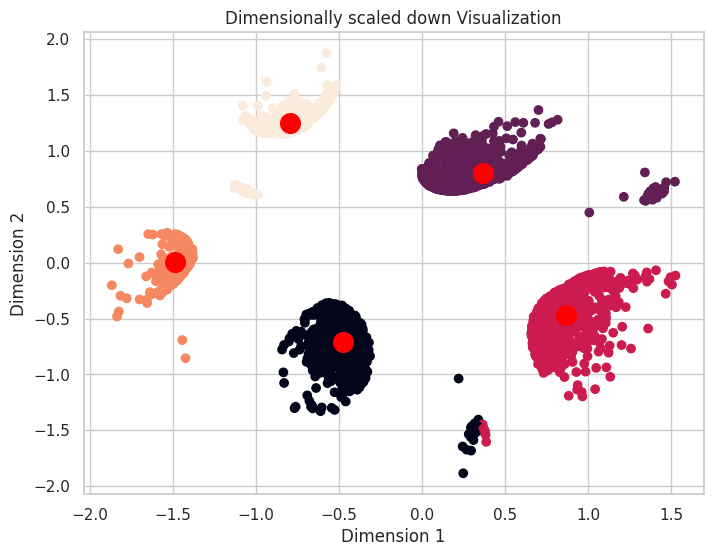

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(reducedCluster[:, 0], reducedCluster[:, 1], c=processedDataset['Clustered'])
plt.scatter(fraud_k_means.cluster_centers_[:, 0], fraud_k_means.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("Dimensionally scaled down Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [32]:
accountBalanceMean = processedDataset.groupby('Clustered')['NormalizedAccountBalance'].mean()
customerAgeMean = processedDataset.groupby('Clustered')['NormalizedCustomerAge'].mean()
transactionAmountMean = processedDataset.groupby('Clustered')['NormalizedTransactionAmount'].mean()
transactionDurationMean = processedDataset.groupby('Clustered')['NormalizedTransactionDuration'].mean()
transactionTypeCreditMean = processedDataset.groupby('Clustered')['TransactionType_Credit'].mean()
transactionTypeDebitMean = processedDataset.groupby('Clustered')['TransactionType_Debit'].mean()
loginAttemptsMean = processedDataset.groupby('Clustered')['NormalizedLoginAttempts'].mean()
channel_ATM_mean = processedDataset.groupby('Clustered')['Channel_ATM'].mean()
channel_branch_mean = processedDataset.groupby('Clustered')['Channel_Branch'].mean()
channel_online_mean = processedDataset.groupby('Clustered')['Channel_Online'].mean()

print(accountBalanceMean)
print(customerAgeMean)
print(transactionAmountMean)
print(transactionDurationMean)
print(loginAttemptsMean)
print(transactionTypeCreditMean)
print(transactionTypeDebitMean)
print(channel_ATM_mean)
print(channel_branch_mean)
print(channel_online_mean)

Clustered
0    0.350313
1    0.317946
2    0.332128
3    0.332167
4    0.367229
Name: NormalizedAccountBalance, dtype: float64
Clustered
0    0.420069
1    0.411492
2    0.433465
3    0.456458
4    0.462860
Name: NormalizedCustomerAge, dtype: float64
Clustered
0    0.145464
1    0.152689
2    0.160027
3    0.168189
4    0.155396
Name: NormalizedTransactionAmount, dtype: float64
Clustered
0    0.366778
1    0.380957
2    0.387601
3    0.366253
4    0.382336
Name: NormalizedTransactionDuration, dtype: float64
Clustered
0    0.024130
1    0.033806
2    0.030965
3    0.037549
4    0.036398
Name: NormalizedLoginAttempts, dtype: float64
Clustered
0    0.026899
1    0.050083
2    0.009126
3    1.000000
4    1.000000
Name: TransactionType_Credit, dtype: float64
Clustered
0    0.973101
1    0.949917
2    0.990874
3    0.000000
4    0.000000
Name: TransactionType_Debit, dtype: float64
Clustered
0    0.026899
1    0.050083
2    1.000000
3    0.007905
4    0.065134
Name: Channel_ATM, dtype: float6

Cluster 8 seems rather suspicious

Key notes include:

*   All transactions take place online
*   Account owners are of an older average age
*   High Account Balance
*   High number of login attempts
*   Long transaction duration times



# 1.1.5 Ethical Considerations


Highlight potential biases or fairness issues in the dataset or models.

Suggest practical strategies for mitigating these ethical challenges.

# Natural Language Processing and Deep Learning Coursework Part 2

# 1.2.1 Text Dataset Selection and Preprocessing


Select a publicly available text dataset, for example, IMDb reviews, Amazon product reviews, AG News, depending
on what you want to achieve.

Preprocess the dataset, for example, clean text, tokenize, remove stopwords, etc.

Use pre-trained embeddings, e.g., GloVe, Word2Vec for feature representation.

# 1.2.2 Deep Learning Model Implementation


Design and train a neural network, e.g., RNN, LSTM for a text-based task, e.g., sentiment analysis.

Clearly explain the model architecture, e.g., embedding layers, hidden layers, activation functions, and
hyperparameter tuning

# 1.2.3 Evaluation and Insights


Use evaluation metrics, e.g., accuracy, precision, recall, loss curves.

Provide visualizations, e.g., learning curves, confusion matrices, to explain findings, where possible.

Highlight strengths, limitations and areas for improvement.